 ** Sibel Cubuk **
 
Adult Income Prediction ML

# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # None: sınırsız, default:20
pd.set_option('display.max_rows', 500)    # None: sınırsız, default:10

# Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [4]:
df.sample(10)

age         workclass  fnlwgt     education  education.num  \
29419   38      Self-emp-inc  379485    Assoc-acdm             12   
16739   34           Private  324654       HS-grad              9   
31888   30      Self-emp-inc  204470  Some-college             10   
22408   25           Private  204338          10th              6   
24549   26           Private   55929       Masters             14   
7264    18           Private   89478  Some-college             10   
4726    45           Private  433665       7th-8th              4   
18240   31           Private  236599     Bachelors             13   
31533   55           Private  171015  Some-college             10   
19288   36  Self-emp-not-inc   84848       HS-grad              9   

           marital.status         occupation   relationship  \
29419            Divorced    Exec-managerial      Unmarried   
16739       Never-married  Machine-op-inspct      Own-child   
31888  Married-civ-spouse    Exec-managerial        Husband   
22408  Married-civ-spouse       Craft-repair        Husband   
24549       Never-married    Exec-managerial  Not-in-family   
7264        Never-married              Sales      Own-child   
4726            Separated      Other-service      Unmarried   
18240  Married-civ-spouse    Exec-managerial        Husband   
31533       Never-married       Adm-clerical      Own-child   
19288           Separated      Other-service  Not-in-family   

                     race     sex  capital.gain  capital.loss  hours.per.week  \
29419               White    Male             0             0              45   
16739  Asian-Pac-Islander    Male             0             0              40   
31888               White    Male             0             0              36   
22408               White    Male             0             0              40   
24549               White  Female             0             0              48   
7264                White  Female             0             0              20   
4726                White  Female             0             0              40   
18240               White    Male             0             0              45   
31533               White  Female             0             0              36   
19288               White  Female             0             0              16   

      native.country income  
29419  United-States  <=50K  
16739          China  <=50K  
31888  United-States   >50K  
22408         Mexico  <=50K  
24549  United-States  <=50K  
7264   United-States  <=50K  
4726          Mexico  <=50K  
18240  United-States   >50K  
31533  United-States  <=50K  
19288  United-States  <=50K

In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe().T 

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education.num   32561.0      10.080679       2.572720      1.0       9.0   
capital.gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital.loss    32561.0      87.303830     402.960219      0.0       0.0   
hours.per.week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education.num       10.0      12.0       16.0  
capital.gain         0.0       0.0    99999.0  
capital.loss         0.0       0.0     4356.0  
hours.per.week      40.0      45.0       99.0

In [8]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
df.duplicated().sum()

24

In [10]:
df = df.drop_duplicates()

In [11]:
df.apply(lambda col: col[col == "?"].count())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [12]:
#Removing Missing Values: 
df = df[(df['workclass']!='?')&(df['occupation']!='?')&(df['native.country']!='?')].copy(deep = True)
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
1          4356              18  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K  
5          3770              45  United-States  <=50K  
6          3770              40  United-States  <=50K

In [13]:
df.shape

(30139, 15)

In [14]:
for col in df.select_dtypes(include = "object"):
    print(col)
    print("***")
    print(df[col].value_counts())
    print("***********")

workclass
***
Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64
***********
education
***
HS-grad         9834
Some-college    6669
Bachelors       5042
Masters         1626
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          556
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          287
1st-4th          149
Preschool         44
Name: education, dtype: int64
***********
marital.status
***
Married-civ-spouse       14059
Never-married             9711
Divorced                  4212
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital.status, dtype: int64
***********
occupation
***
Prof-specialty       4034
Craft-repair         4025
Exec-managerial     

In [15]:
df.groupby("relationship")["marital.status"].value_counts(dropna=False)

relationship    marital.status       
Husband         Married-civ-spouse       12448
                Married-AF-spouse            9
Not-in-family   Never-married             4437
                Divorced                  2267
                Widowed                    432
                Separated                  383
                Married-spouse-absent      181
                Married-civ-spouse          14
Other-relative  Never-married              548
                Married-civ-spouse         118
                Divorced                   103
                Separated                   53
                Widowed                     40
                Married-spouse-absent       26
                Married-AF-spouse            1
Own-child       Never-married             3925
                Divorced                   308
                Separated                   90
                Married-civ-spouse          83
                Married-spouse-absent       43
                Widowe

In [16]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

df['marital.status'].value_counts()

Married          14450
Never-married     9711
Separated         5151
Widowed            827
Name: marital.status, dtype: int64

In [17]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

df['workclass'].value_counts()

Private           22264
Govt_employees     4289
Self_employed      3572
Without-pay          14
Name: workclass, dtype: int64

In [18]:
 df['income'].replace({'<=50K': 0, '>50K': 1}, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education.num   30139 non-null  int64 
 5   marital.status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital.gain    30139 non-null  int64 
 11  capital.loss    30139 non-null  int64 
 12  hours.per.week  30139 non-null  int64 
 13  native.country  30139 non-null  object
 14  income          30139 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [20]:
df.income.value_counts()

0    22633
1     7506
Name: income, dtype: int64

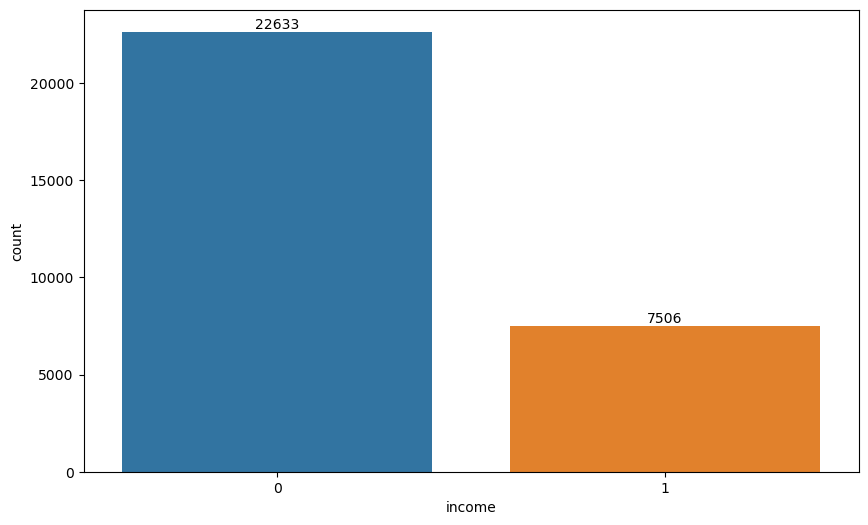

In [21]:
ax= sns.countplot(df["income"])
ax.bar_label(ax.containers[0]);

Our dataset has 25000 people earning <=50K i.e. 75% and remainng 25% earns more than 50K.



In [22]:
capital_gain_0= df[df['capital.loss'] > 0].loc[:,['capital.loss','capital.gain']].sample(10)

capital_loss_0 = df[df['capital.gain'] > 0].loc[:,['capital.loss','capital.gain']].sample(5)
print(capital_gain_0.head())
print(capital_loss_0.head())

      capital.loss  capital.gain
904           1876             0
1037          1740             0
264           2051             0
1440          1408             0
817           1887             0
      capital.loss  capital.gain
3985             0          2202
2522             0          7688
2195             0         14084
1712             0         27828
3755             0          3103


That means 92% of people are having capital gain equal to zero.

Possibilities for capital gain and capital loss

Both capital gain and capital loss can be zero

If capital.gain is zero there is possibility of capital loss being high or above zero.

If capital loss is zero there is possibility of capital.gain being high or above zero.

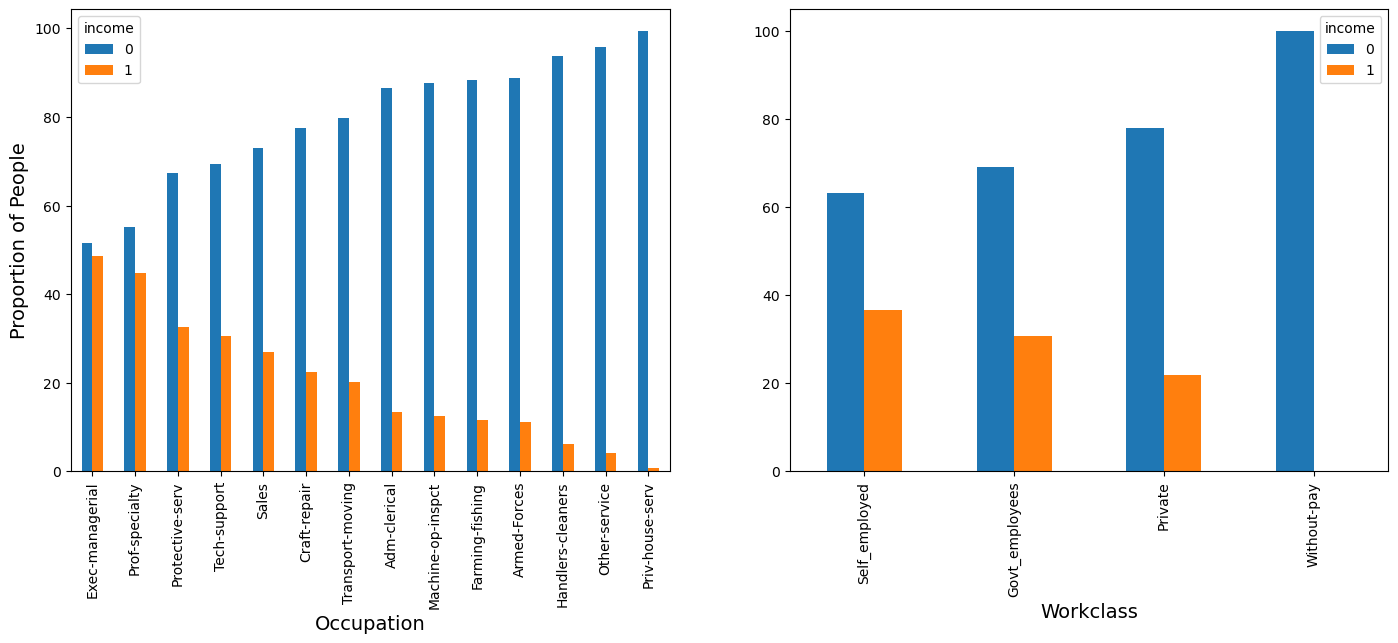

In [23]:
table_occu = pd.crosstab(df["occupation"], df['income'])
table_workclass = pd.crosstab(df['workclass'], df['income'])
table_edu = pd.crosstab(df['education.num'], df['income'])
table_marital = pd.crosstab(df['marital.status'], df['income'])
table_race = pd.crosstab(df['race'], df['income'])
table_sex = pd.crosstab(df['sex'], df['income'])
table_country = pd.crosstab(df['native.country'], df['income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);

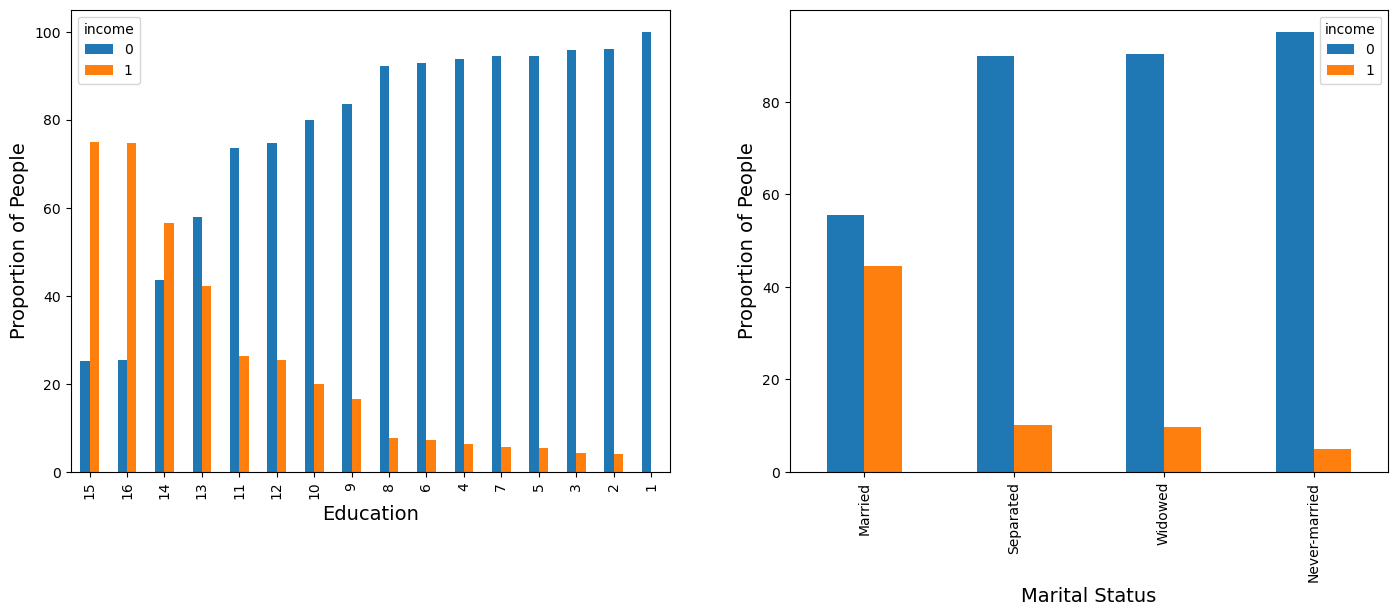

In [24]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

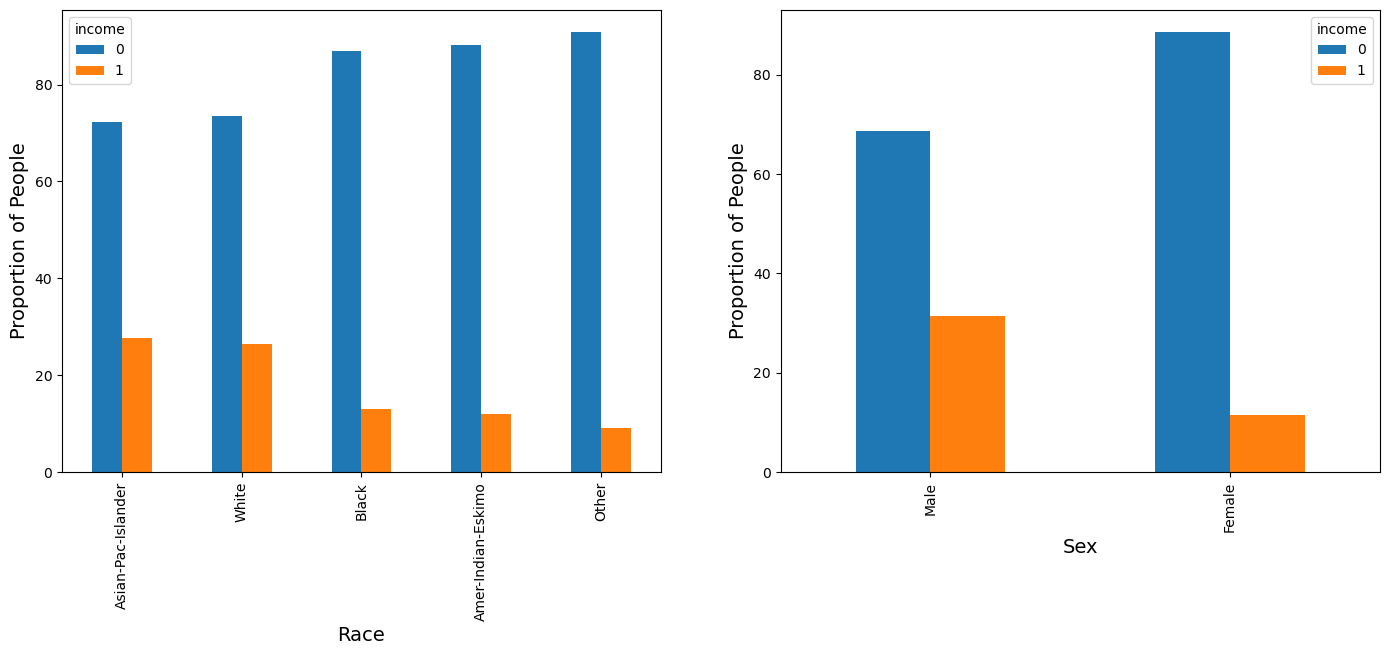

In [25]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_race.div(table_race.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_sex.div(table_sex.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax =ax);
plt.xlabel('Sex',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

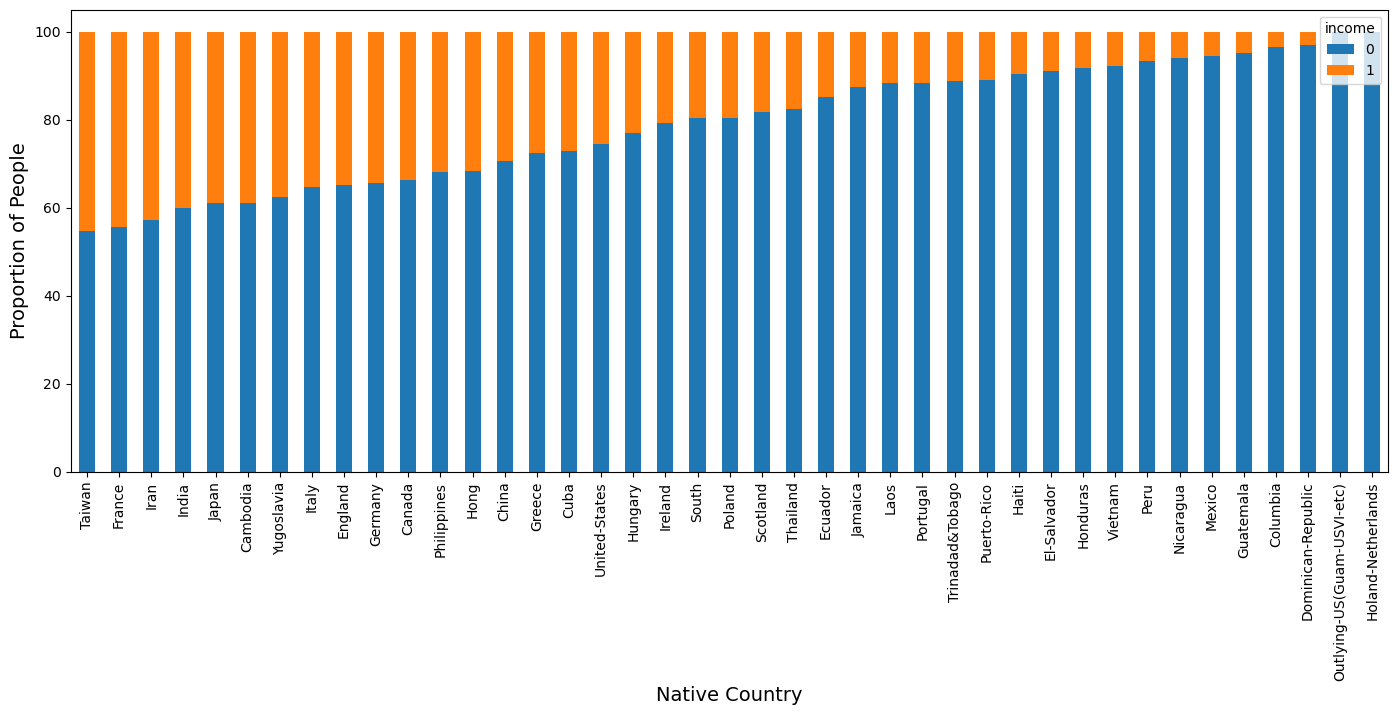

In [26]:
table_country = pd.crosstab(df['native.country'], df['income'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

Summary

Sex:- Out of total male 30% of them earn salary more than 50K while less than 15% female earn more than 50K. 89% 
female earn less than 50K

Race:- White and asain-pac-Islander earn salary more than 50K

marital_status :- 41% of married people seem to earn salary greater than 50K.

People having degree doctorate,prof-school,masters are making salary more than 50K.

Out of all the workclass only 59% self employed people are making salary more than 50K.

If I check by occupation, Proportion of people making salary less than 50K is higher.

Let's find correlation between numerical fetatures

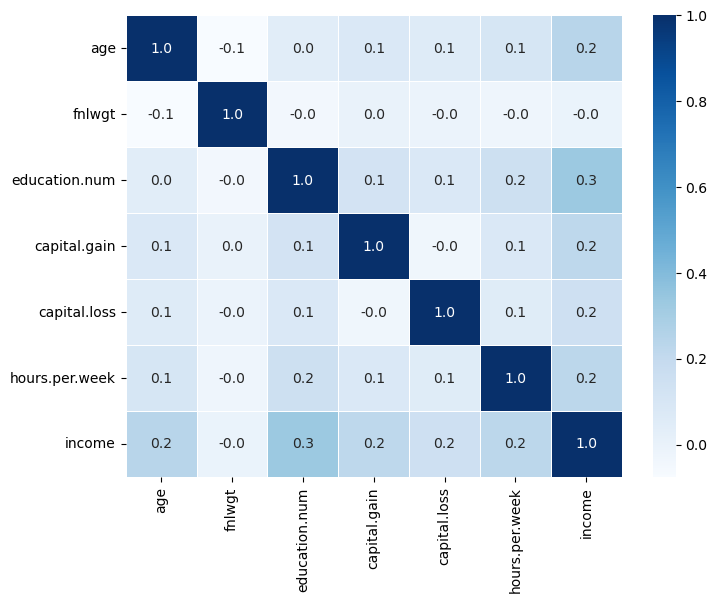

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.1f',ax = ax, cmap = 'Blues')
plt.show()

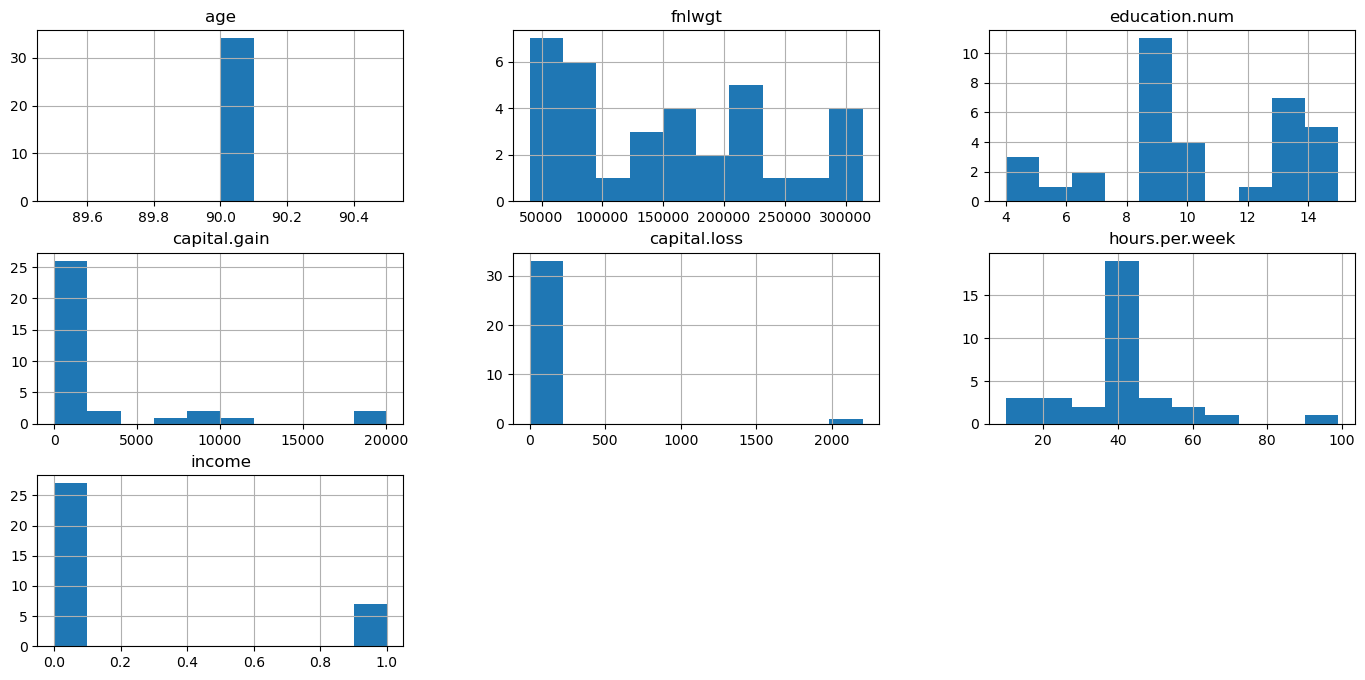

In [28]:
df[df['age'] == 90].hist(figsize = (17,8));

In [29]:
# drop rows with age 90
print("Number of observation before removing:",df.shape)
index_age = df[df['age'] == 90].index
df.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",df.shape)

Number of observation before removing: (30139, 15)
Number of observation after removing: (30105, 15)


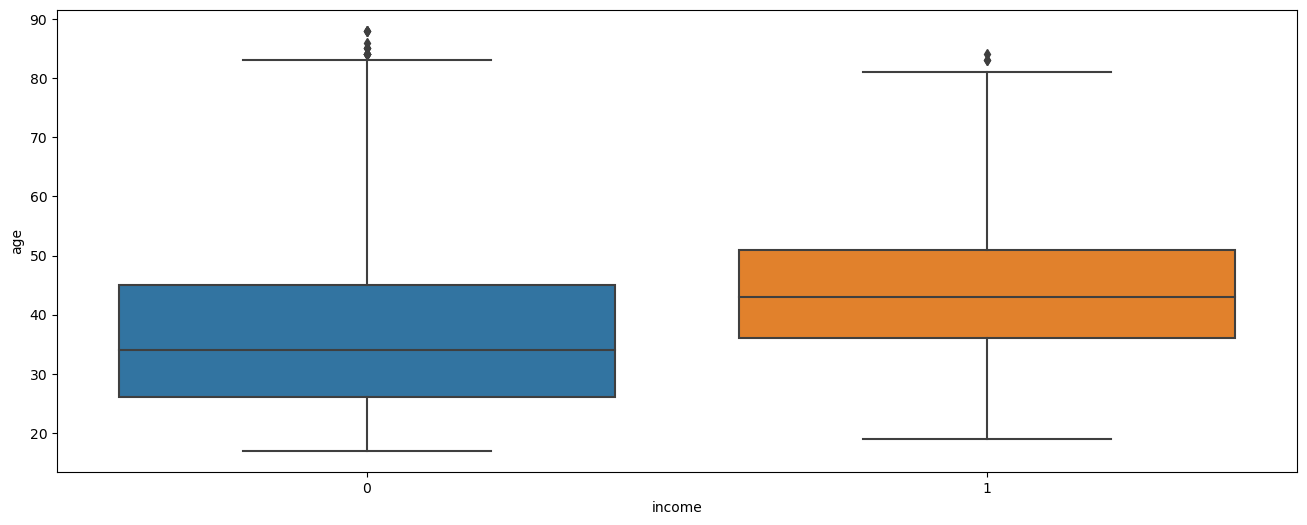

In [30]:
plt.figure(figsize=(16,6))
sns.boxplot(x="income", y="age", data=df, whis=2)
plt.show()

In [31]:
hrs_per_week = df[df['hours.per.week'] == 99]
print("Number of people working for 99 hours per week:", hrs_per_week.shape[0])

Number of people working for 99 hours per week: 77


It won't be a good idea to delete all the outliers because if that's the case with test data too we might get false results. So I am keeping people working for 99 hourse per week.

In [32]:
# df = pd.get_dummies(df, drop_first =True)

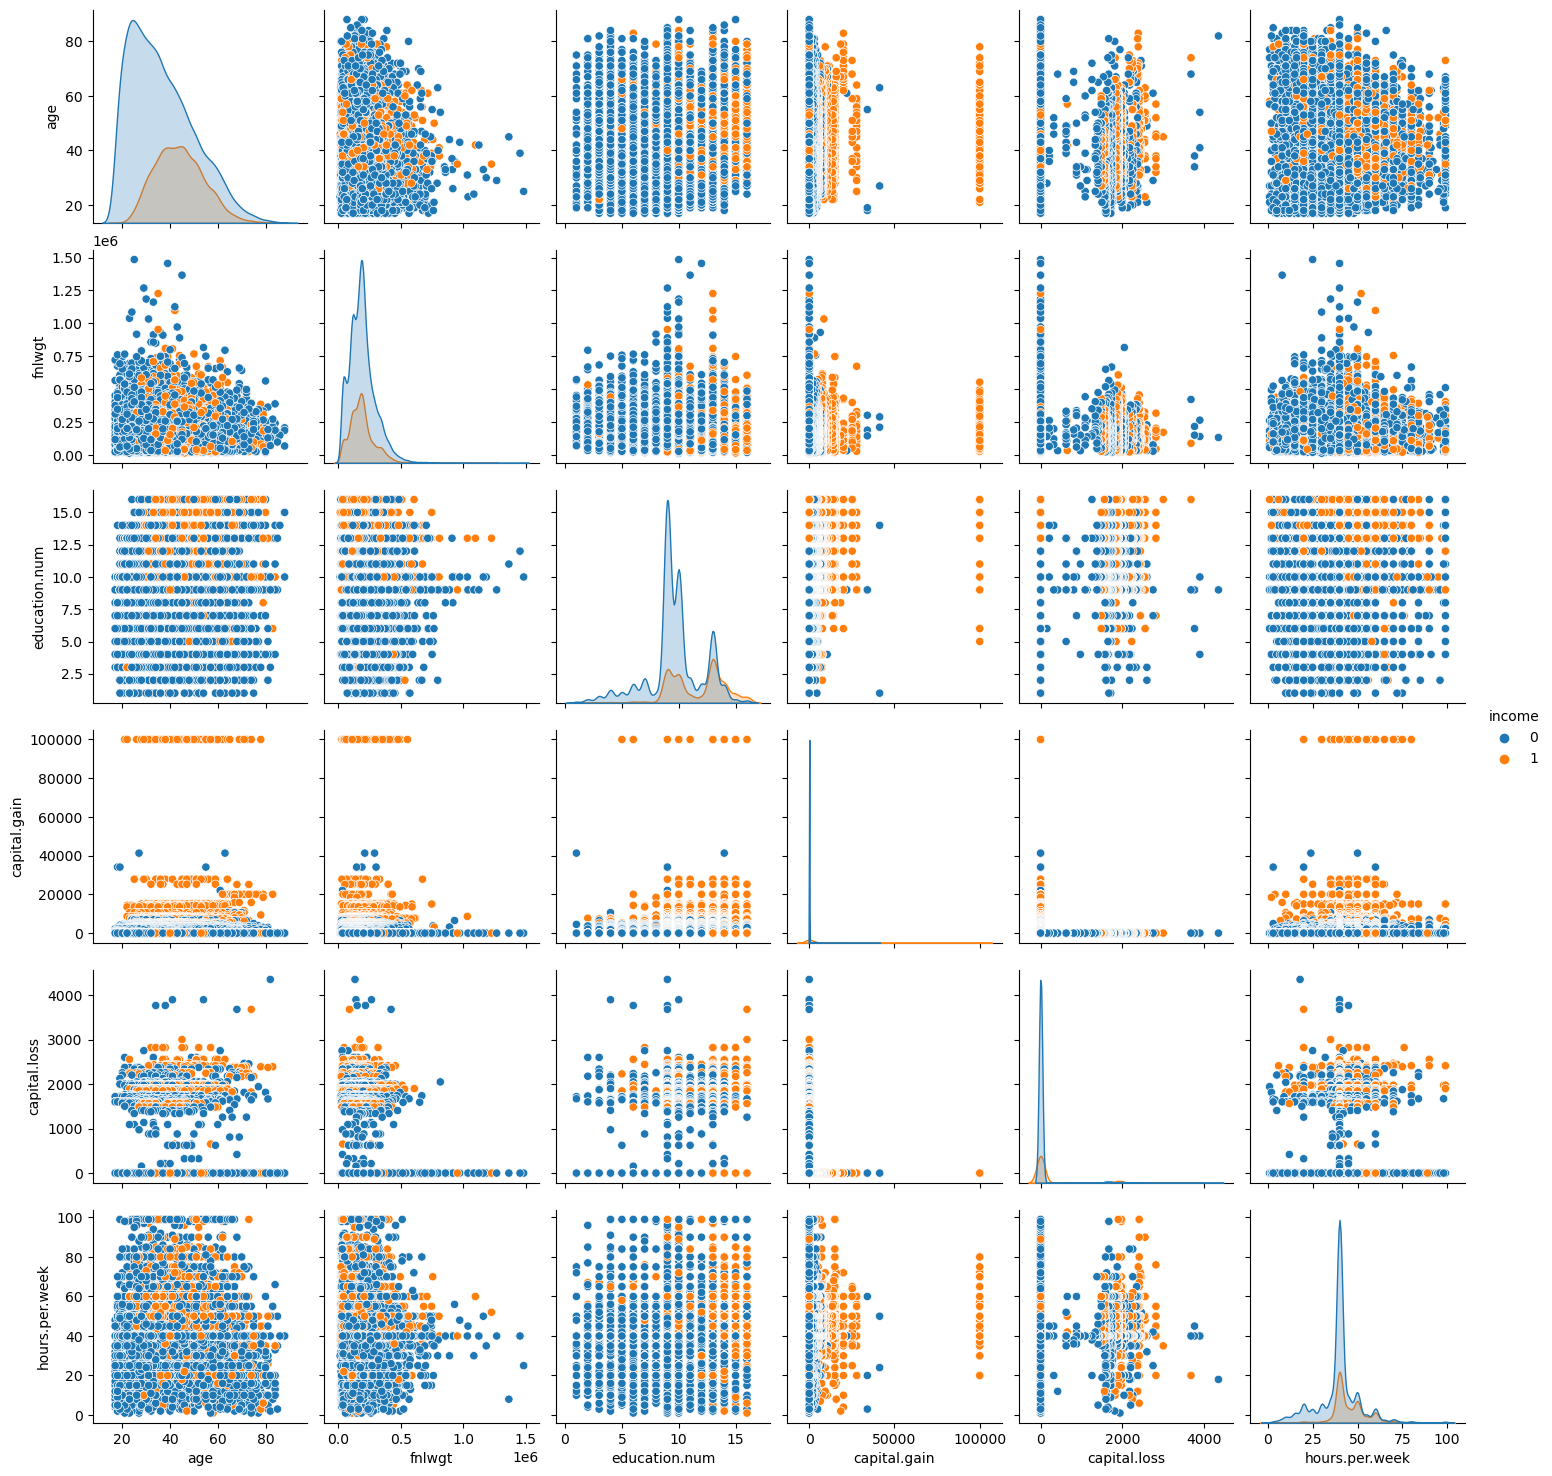

In [33]:
sns.pairplot(df,hue="income");

In [33]:
# Before starting LogisticRegression I will remove the some unnecessary features

df=df.drop(["fnlwgt","education.num"],axis=1)

In [34]:
df.head()

age workclass     education marital.status         occupation  \
1   82   Private       HS-grad        Widowed    Exec-managerial   
3   54   Private       7th-8th      Separated  Machine-op-inspct   
4   41   Private  Some-college      Separated     Prof-specialty   
5   34   Private       HS-grad      Separated      Other-service   
6   38   Private          10th      Separated       Adm-clerical   

    relationship   race     sex  capital.gain  capital.loss  hours.per.week  \
1  Not-in-family  White  Female             0          4356              18   
3      Unmarried  White  Female             0          3900              40   
4      Own-child  White  Female             0          3900              40   
5      Unmarried  White  Female             0          3770              45   
6      Unmarried  White    Male             0          3770              40   

  native.country  income  
1  United-States       0  
3  United-States       0  
4  United-States       0  
5  United-States       0  
6  United-States       0

# Logistic Regression

In [35]:

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [36]:
get_unique_values(df)

Column Name  Number of Unique Values  \
0              age                       71   
1        workclass                        4   
2        education                       16   
3   marital.status                        4   
4       occupation                       14   
5     relationship                        6   
6             race                        5   
7              sex                        2   
8     capital.gain                      118   
9     capital.loss                       90   
10  hours.per.week                       94   
11  native.country                       41   
12          income                        2   

                                       Unique Values  Data Type  
0                                                   -     int64  
1   [Private, Govt_employees, Self_employed, Witho...    object  
2                                                   -    object  
3        [Widowed, Separated, Never-married, Married]    object  
4                                                   -    object  
5   [Not-in-family, Unmarried, Own-child, Other-re...    object  
6   [White, Black, Asian-Pac-Islander, Other, Amer...    object  
7                                      [Female, Male]    object  
8                                                   -     int64  
9                                                   -     int64  
10                                                  -     int64  
11                                                  -    object  
12                                             [0, 1]     int64

### Label Encoding

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['sex'])
df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital-status'] = label_encoder.fit_transform(df['marital.status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['native-country'] = label_encoder.fit_transform(df['native.country'])
df['race']=label_encoder.fit_transform(df['race'])

df=df.drop(["marital.status","sex","native.country"],axis=1)

In [38]:
df.head(10)

age  workclass  education  occupation  relationship  race  capital.gain  \
1    82          1         11           3             1     4             0   
3    54          1          5           6             4     4             0   
4    41          1         15           9             3     4             0   
5    34          1         11           7             4     4             0   
6    38          1          0           0             4     4             0   
7    74          0         10           9             2     4             0   
8    68          0         11           9             1     4             0   
10   45          1         10           9             4     2             0   
11   38          2         14           9             1     4             0   
12   52          1          9           7             1     4             0   

    capital.loss  hours.per.week  income  gender  marital-status  \
1           4356              18       0       0               3   
3           3900              40       0       0               2   
4           3900              40       0       0               2   
5           3770              45       0       0               2   
6           3770              40       0       1               2   
7           3683              20       1       0               1   
8           3683              40       0       0               2   
10          3004              35       1       0               2   
11          2824              45       1       1               1   
12          2824              20       1       0               3   

    native-country  
1               38  
3               38  
4               38  
5               38  
6               38  
7               38  
8               38  
10              38  
11              38  
12              38

### Test|Train Split

In [39]:
X= df.drop(columns="income")
y= df.income

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

In [41]:
scaler =StandardScaler()

In [42]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

In [43]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [45]:
y_pred=log_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [46]:
y_pred_proba = log_model.predict_proba(X_test)
y_pred_proba

array([[0.00000000e+00, 1.00000000e+00],
       [1.74235937e-09, 9.99999998e-01],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.90878432e-14, 1.00000000e+00]])

In [47]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    


In [48]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

age  workclass  education  occupation  relationship  race  \
32334   36          1          0           2             0     4   
7844    49          2         11           7             1     4   
19981   50          0          9          10             0     4   
15843   19          1         15           7             3     4   
23620   25          1         11           0             1     4   
11484   72          1         11           5             0     4   
25650   57          0         15           0             0     4   
17945   49          0          9           9             0     4   
2545    42          1         11           2             0     2   
21152   44          0          7           9             0     4   

       capital.gain  capital.loss  hours.per.week  gender  marital-status  \
32334             0             0              40       1               0   
7844              0             0              45       1               2   
19981             0             0              44       1               0   
15843             0             0              15       0               1   
23620             0             0              48       0               1   
11484             0             0              20       1               0   
25650             0             0              40       1               0   
17945             0             0              40       1               0   
2545           7688             0              45       1               0   
21152             0             0              48       1               0   

       native-country  income  pred  pred_proba  
32334              38       0     1         1.0  
7844               38       0     1         1.0  
19981              38       1     1         1.0  
15843              38       0     1         1.0  
23620              38       0     1         1.0  
11484              38       0     1         1.0  
25650              38       1     1         1.0  
17945              38       1     1         1.0  
2545               38       1     1         1.0  
21152              38       0     1         1.0

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[4234  287]
 [ 878  622]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4521
           1       0.68      0.41      0.52      1500

    accuracy                           0.81      6021
   macro avg       0.76      0.68      0.70      6021
weighted avg       0.79      0.81      0.79      6021


Train_Set
[[16905  1180]
 [ 3571  2428]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     18085
           1       0.67      0.40      0.51      5999

    accuracy                           0.80     24084
   macro avg       0.75      0.67      0.69     24084
weighted avg       0.79      0.80      0.78     24084



# GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
model = LogisticRegression(random_state=42, max_iter=100000)

penalty = ["l1", "l2"]

C = [0.001, 0.01, 0.1, 1, 10, 100]

class_weight=['balanced', None]

solver = [ 'liblinear', 'sag', 'saga']

param_grid = {"penalty" : penalty,
             "C" : C,
             "class_weight": class_weight,
             "solver" : solver}

grid_model = GridSearchCV(estimator= model,
                          param_grid= param_grid,
                         cv = 10,
                         scoring = "f1",
                         n_jobs = -1)

In [52]:
grid_model.fit(X_train_scaled,y_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=100000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='f1')

In [53]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[2856 1665]
 [ 153 1347]]
              precision    recall  f1-score   support

           0       0.95      0.63      0.76      4521
           1       0.45      0.90      0.60      1500

    accuracy                           0.70      6021
   macro avg       0.70      0.76      0.68      6021
weighted avg       0.82      0.70      0.72      6021


Train_Set
[[11511  6574]
 [  692  5307]]
              precision    recall  f1-score   support

           0       0.94      0.64      0.76     18085
           1       0.45      0.88      0.59      5999

    accuracy                           0.70     24084
   macro avg       0.69      0.76      0.68     24084
weighted avg       0.82      0.70      0.72     24084



# K-Nearest Neighbors (KNN) Classification

In [54]:
scaler = StandardScaler()

In [55]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [58]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [59]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [60]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [61]:
pd.DataFrame(y_pred_proba)

0    1
0     0.6  0.4
1     1.0  0.0
2     0.8  0.2
3     1.0  0.0
4     0.4  0.6
...   ...  ...
6016  1.0  0.0
6017  1.0  0.0
6018  0.4  0.6
6019  0.8  0.2
6020  1.0  0.0

[6021 rows x 2 columns]

In [62]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [63]:
pd.DataFrame.from_dict(my_dict).sample(10)

Actual  Pred  Proba_1  Proba_0
18481       0     0      0.0      1.0
31368       0     0      0.4      0.6
3941        0     0      0.0      1.0
9915        0     0      0.0      1.0
16383       0     0      0.0      1.0
10121       1     1      0.6      0.4
13683       0     0      0.0      1.0
32532       0     0      0.0      1.0
3602        0     0      0.0      1.0
8706        1     0      0.0      1.0

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [65]:
confusion_matrix(y_test, y_pred)

array([[4047,  474],
       [ 598,  902]])

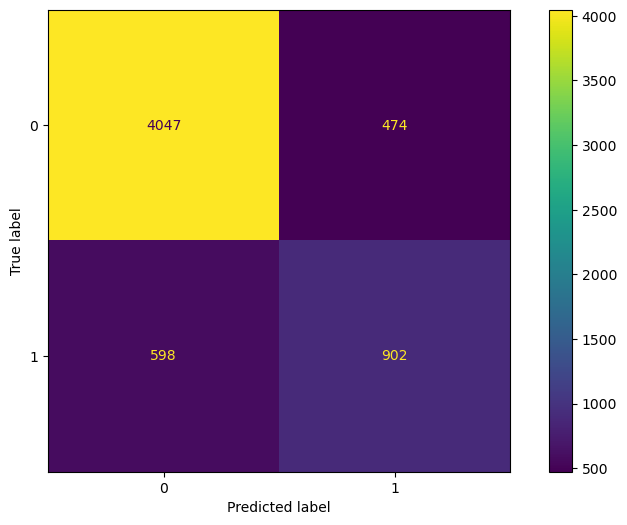

In [66]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [67]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4047  474]
 [ 598  902]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4521
           1       0.66      0.60      0.63      1500

    accuracy                           0.82      6021
   macro avg       0.76      0.75      0.76      6021
weighted avg       0.82      0.82      0.82      6021



## Elbow Method for Choosing Reasonable K Values

In [68]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [69]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.xticks(range(0, 31, 1));

In this error rate vs K value graph, the best performance K value is 16. And after the K value of 16, there are no more changes in this graph.

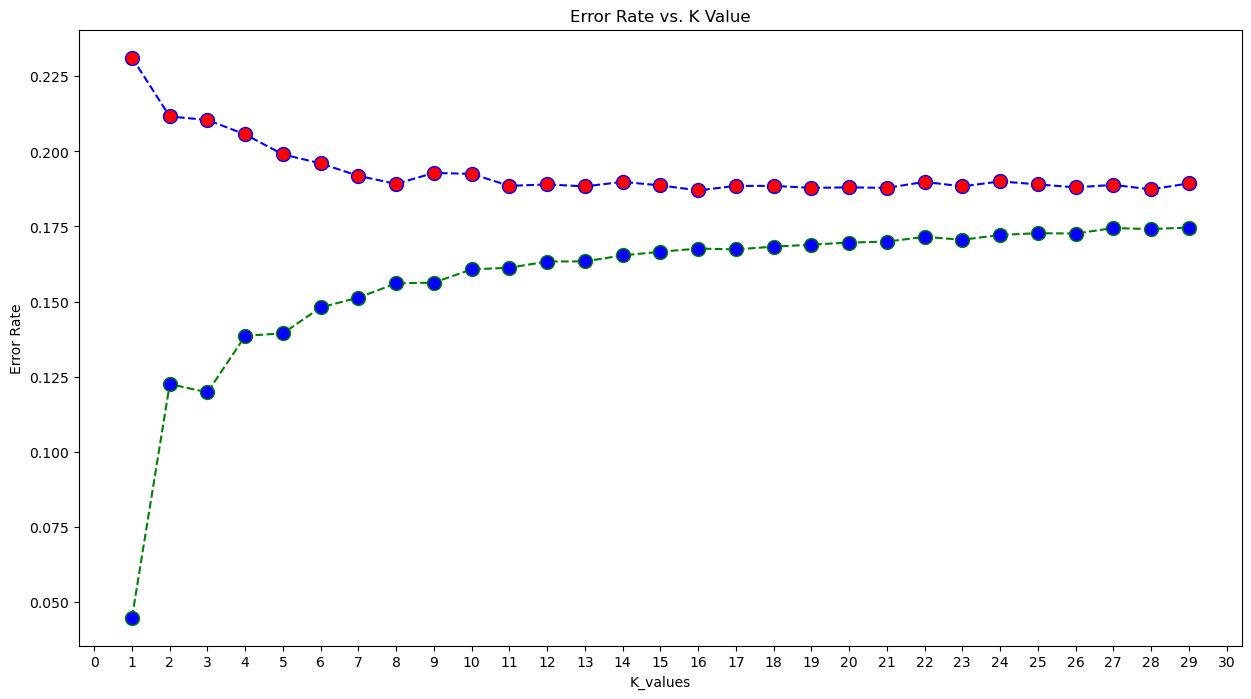

In [71]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.xticks(range(0, 31, 1));

In [70]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [71]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train_scaled,y_train)
print('WITH K=8\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=8

Test_Set

[[4190  331]
 [ 726  774]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4521
           1       0.70      0.52      0.59      1500

    accuracy                           0.82      6021
   macro avg       0.78      0.72      0.74      6021
weighted avg       0.81      0.82      0.81      6021


Train_Set

[[17160   925]
 [ 2568  3431]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     18085
           1       0.79      0.57      0.66      5999

    accuracy                           0.85     24084
   macro avg       0.83      0.76      0.79     24084
weighted avg       0.85      0.85      0.85     24084



In [72]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train_scaled,y_train)
print('WITH K=11\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)



WITH K=11

Test_Set

[[4113  408]
 [ 640  860]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4521
           1       0.68      0.57      0.62      1500

    accuracy                           0.83      6021
   macro avg       0.77      0.74      0.75      6021
weighted avg       0.82      0.83      0.82      6021


Train_Set

[[16757  1328]
 [ 2253  3746]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     18085
           1       0.74      0.62      0.68      5999

    accuracy                           0.85     24084
   macro avg       0.81      0.78      0.79     24084
weighted avg       0.85      0.85      0.85     24084



In [73]:
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train_scaled,y_train)
print('WITH K=14\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=14

Test_Set

[[4174  347]
 [ 692  808]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4521
           1       0.70      0.54      0.61      1500

    accuracy                           0.83      6021
   macro avg       0.78      0.73      0.75      6021
weighted avg       0.82      0.83      0.82      6021


Train_Set

[[16967  1118]
 [ 2585  3414]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     18085
           1       0.75      0.57      0.65      5999

    accuracy                           0.85     24084
   macro avg       0.81      0.75      0.77     24084
weighted avg       0.84      0.85      0.84     24084



In [74]:
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_train_scaled,y_train)
print('WITH K=26\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=26

Test_Set

[[4166  355]
 [ 692  808]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4521
           1       0.69      0.54      0.61      1500

    accuracy                           0.83      6021
   macro avg       0.78      0.73      0.75      6021
weighted avg       0.82      0.83      0.82      6021


Train_Set

[[16798  1287]
 [ 2645  3354]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90     18085
           1       0.72      0.56      0.63      5999

    accuracy                           0.84     24084
   macro avg       0.79      0.74      0.76     24084
weighted avg       0.83      0.84      0.83     24084



## Cross Validate For Optimal K Value

In [78]:
from sklearn.model_selection import cross_val_score, cross_validate

In [80]:
model = KNeighborsClassifier(n_neighbors=14)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
1   0.030536    0.486168       0.820672        0.685841     0.516667  0.589354
2   0.014971    0.460557       0.819427        0.682119     0.515000  0.586895
3   0.014912    0.463698       0.826899        0.707483     0.520000  0.599424
4   0.015030    0.455341       0.819427        0.677419     0.525000  0.591549
5   0.015893    0.472010       0.834302        0.721239     0.544240  0.620362
6   0.015886    0.469386       0.822259        0.699074     0.503333  0.585271
7   0.015072    0.469820       0.823505        0.695749     0.518333  0.594078
8   0.015095    0.469731       0.827243        0.700873     0.535000  0.606805
9   0.015177    0.471440       0.814369        0.665227     0.513333  0.579492
10  0.015199    0.480499       0.823090        0.694196     0.518333  0.593511

In [81]:
df_scores.mean()[2:]

test_accuracy     0.823119
test_precision    0.692922
test_recall       0.520924
test_f1           0.594674
dtype: float64

##  Gridsearch Method for Choosing Reasonable K Values

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
knn_grid = KNeighborsClassifier()

In [84]:
k_values= range(1,30)

In [85]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}


In [86]:
knn_grid_model = GridSearchCV(knn_grid, 
                              param_grid, 
                              cv=10, 
                              scoring= 'f1')

In [87]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [88]:
knn_grid_model.best_params_

{'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}

In [89]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train_scaled,y_train)
print('WITH K=13\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=13

Test_Set

[[4106  415]
 [ 634  866]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4521
           1       0.68      0.58      0.62      1500

    accuracy                           0.83      6021
   macro avg       0.77      0.74      0.75      6021
weighted avg       0.82      0.83      0.82      6021


Train_Set

[[16725  1360]
 [ 2288  3711]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18085
           1       0.73      0.62      0.67      5999

    accuracy                           0.85     24084
   macro avg       0.81      0.77      0.79     24084
weighted avg       0.84      0.85      0.84     24084



In [90]:
# First a quick comparison to our original K=16

knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train_scaled,y_train)
print('WITH K=16\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=16

Test_Set

[[4175  346]
 [ 684  816]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4521
           1       0.70      0.54      0.61      1500

    accuracy                           0.83      6021
   macro avg       0.78      0.73      0.75      6021
weighted avg       0.82      0.83      0.82      6021


Train_Set

[[16941  1144]
 [ 2611  3388]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     18085
           1       0.75      0.56      0.64      5999

    accuracy                           0.84     24084
   macro avg       0.81      0.75      0.77     24084
weighted avg       0.84      0.84      0.84     24084



In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = {'knn__n_neighbors': range(1,30)}
pipe_model = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])

In [93]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= 'f1')

In [94]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='f1')

In [95]:
pipe_grid.best_params_

{'knn__n_neighbors': 15}

In [96]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=15\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=15

Test_Set

[[4121  400]
 [ 636  864]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4521
           1       0.68      0.58      0.63      1500

    accuracy                           0.83      6021
   macro avg       0.77      0.74      0.76      6021
weighted avg       0.82      0.83      0.82      6021


Train_Set

[[16690  1395]
 [ 2340  3659]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18085
           1       0.72      0.61      0.66      5999

    accuracy                           0.84     24084
   macro avg       0.80      0.77      0.78     24084
weighted avg       0.84      0.84      0.84     24084



In this Project, K-Nearest Neighbors (KNN) algorithm is a useful for analyzing adult income. The algorithm provides a simple and intuitive method for predicting income based on various features such as age, education, and occupation. The performance of KNN is dependent on the choice of the hyperparameters, such as the number of neighbors and distance metric, which can be optimized using cross-validation score

 # Decision Tree Classification

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
DT_model = DecisionTreeClassifier(random_state=101)

In [99]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [100]:
y_pred = DT_model.predict(X_test)

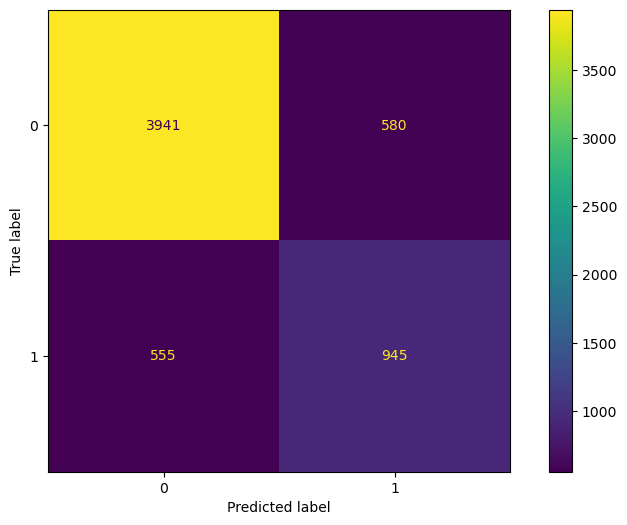

In [101]:
plot_confusion_matrix(DT_model,X_test,y_test)
plt.show()

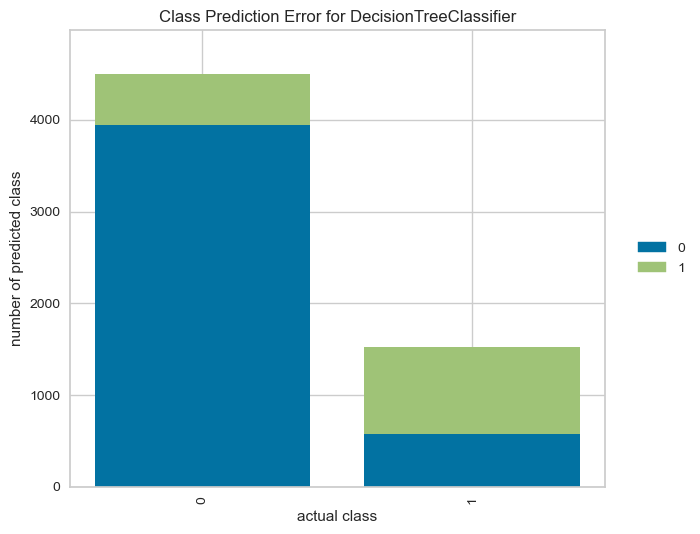

In [102]:
from yellowbrick.classifier import ClassPredictionError


visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();



In [103]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set

[[3941  580]
 [ 555  945]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4521
           1       0.62      0.63      0.62      1500

    accuracy                           0.81      6021
   macro avg       0.75      0.75      0.75      6021
weighted avg       0.81      0.81      0.81      6021


Train_Set

[[17992    93]
 [  509  5490]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18085
           1       0.98      0.92      0.95      5999

    accuracy                           0.98     24084
   macro avg       0.98      0.96      0.97     24084
weighted avg       0.98      0.98      0.97     24084



## Cross Validate

In [106]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10, return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision_micro  \
1   0.055148    0.004069       0.813616        0.976655              0.813616   
2   0.042037    0.003491       0.810295        0.976840              0.810295   
3   0.042605    0.003276       0.797841        0.975594              0.797841   
4   0.041135    0.003336       0.794521        0.976148              0.794521   
5   0.041860    0.003255       0.807724        0.976195              0.807724   
6   0.042110    0.003193       0.805648        0.976379              0.805648   
7   0.042249    0.003247       0.803571        0.976103              0.803571   
8   0.042254    0.003427       0.809385        0.976702              0.809385   
9   0.041808    0.003598       0.789867        0.976979              0.789867   
10  0.042347    0.004065       0.800249        0.976379              0.800249   

    train_precision_micro  test_recall_micro  train_recall_micro  \
1                0.976655           0.813616            0.976655   
2                0.976840           0.810295            0.976840   
3                0.975594           0.797841            0.975594   
4                0.976148           0.794521            0.976148   
5                0.976195           0.807724            0.976195   
6                0.976379           0.805648            0.976379   
7                0.976103           0.803571            0.976103   
8                0.976702           0.809385            0.976702   
9                0.976979           0.789867            0.976979   
10               0.976379           0.800249            0.976379   

    test_f1_micro  train_f1_micro  
1        0.813616        0.976655  
2        0.810295        0.976840  
3        0.797841        0.975594  
4        0.794521        0.976148  
5        0.807724        0.976195  
6        0.805648        0.976379  
7        0.803571        0.976103  
8        0.809385        0.976702  
9        0.789867        0.976979  
10       0.800249        0.976379

In [107]:
df_scores.mean()[2:]

test_accuracy            0.803272
train_accuracy           0.976397
test_precision_micro     0.803272
train_precision_micro    0.976397
test_recall_micro        0.803272
train_recall_micro       0.976397
test_f1_micro            0.803272
train_f1_micro           0.976397
dtype: float64

## Feature Importances

In [108]:
DT_model.feature_importances_

array([0.19190889, 0.03980478, 0.10220855, 0.07953537, 0.02040209,
       0.02080474, 0.13886298, 0.05799034, 0.10766217, 0.00783549,
       0.21265623, 0.02032836])

In [109]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

Feature Importance
gender                    0.007835
native-country            0.020328
relationship              0.020402
race                      0.020805
workclass                 0.039805
capital.loss              0.057990
occupation                0.079535
education                 0.102209
hours.per.week            0.107662
capital.gain              0.138863
age                       0.191909
marital-status            0.212656

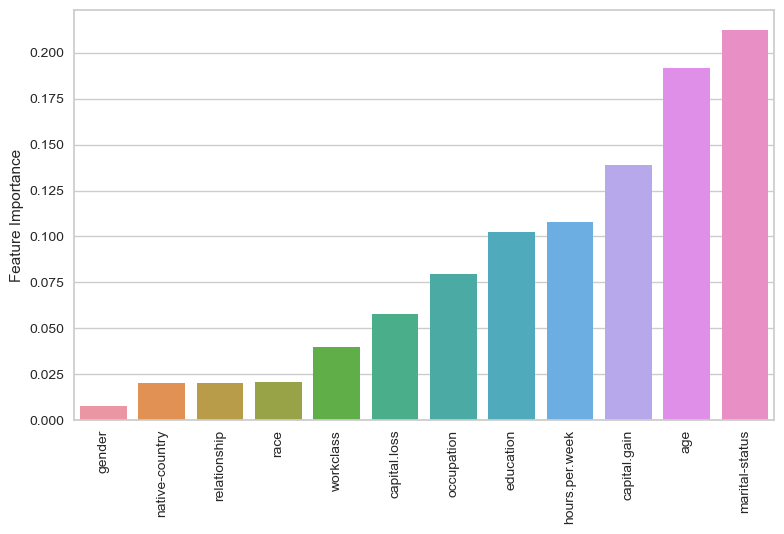

In [110]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

## Drop most important feature

In [111]:
X2 = X.drop(columns = ["marital-status"])

In [112]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101)

In [113]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [114]:
DT2_model.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [115]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set

[[3950  540]
 [ 630  901]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4490
           1       0.63      0.59      0.61      1531

    accuracy                           0.81      6021
   macro avg       0.74      0.73      0.74      6021
weighted avg       0.80      0.81      0.80      6021


Train_Set

[[18037    79]
 [  524  5444]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18116
           1       0.99      0.91      0.95      5968

    accuracy                           0.97     24084
   macro avg       0.98      0.95      0.97     24084
weighted avg       0.98      0.97      0.97     24084



In [116]:
df_f_i2 = pd.DataFrame(index=X2.columns, data = DT2_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i2

Feature Importance
gender                    0.005570
race                      0.020629
native-country            0.024413
workclass                 0.039943
capital.loss              0.058277
occupation                0.084676
education                 0.100924
hours.per.week            0.111754
capital.gain              0.144582
age                       0.189331
relationship              0.219901

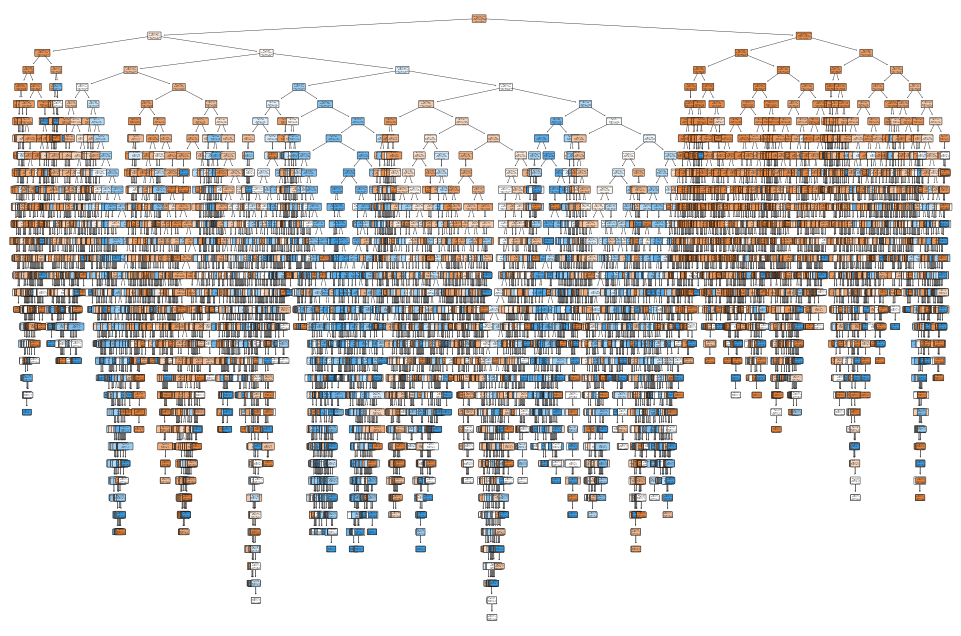

In [116]:
df["income"] = df["income"].map({0:"<=50K", 1: ">50K"}) 

plt.figure(figsize=(12,8),dpi=100)
plot_tree(DT_model, filled=True, feature_names=X.columns, rounded=True, class_names=df.income.unique());
plt.show()

In [118]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df.species.unique());

## Find Best Parameters

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
model = DecisionTreeClassifier(random_state=101)

In [121]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9]}

In [122]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [123]:
grid_model.fit(X_train2, y_train2)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/sibel/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/sibel/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/sibel/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/sibel/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feature

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [124]:
grid_model.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'best'}

In [126]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set

[[4115  375]
 [ 602  929]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4490
           1       0.71      0.61      0.66      1531

    accuracy                           0.84      6021
   macro avg       0.79      0.76      0.77      6021
weighted avg       0.83      0.84      0.83      6021


Train_Set

[[17184   932]
 [ 1982  3986]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     18116
           1       0.81      0.67      0.73      5968

    accuracy                           0.88     24084
   macro avg       0.85      0.81      0.83     24084
weighted avg       0.88      0.88      0.87     24084




After performing various classification techniques and taking into account their accuracies, we can conclude all the models had an accuracy ranging from 81% to 84%. Out of which Decision Tree gave a slightly better accuracy of 82%.So we choose Decision Tree as the best model.